<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

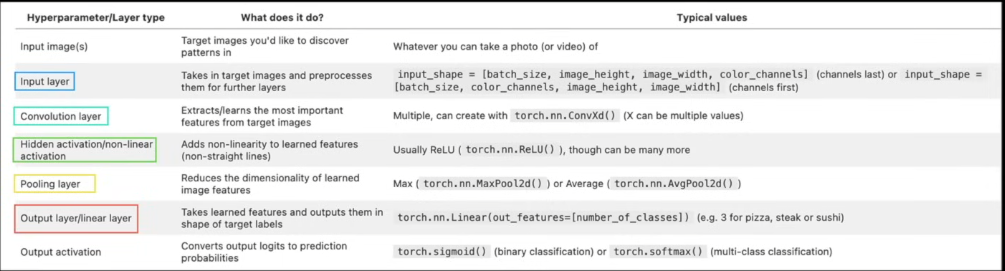

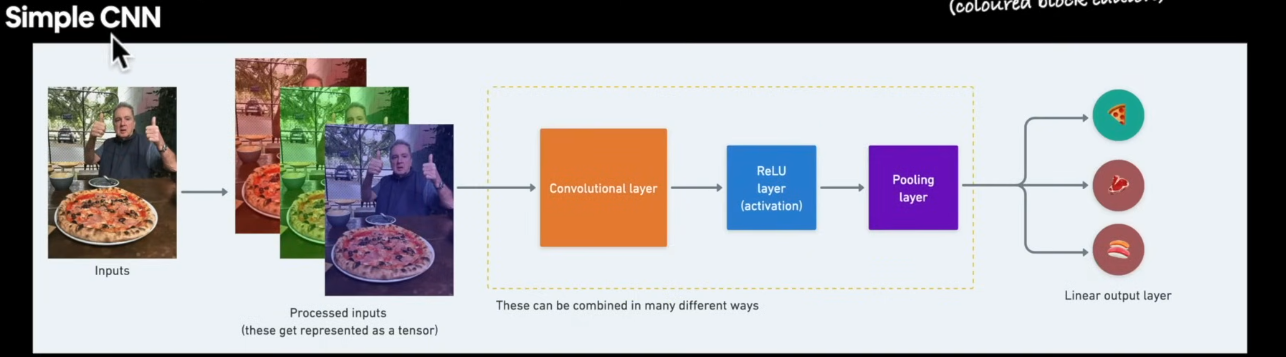

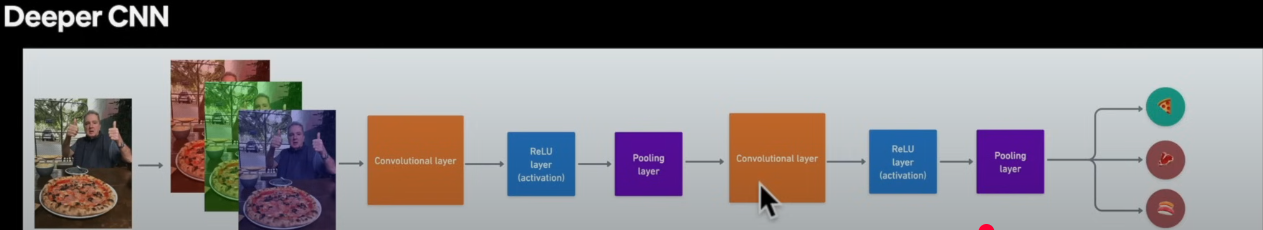

In [7]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [8]:
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"

device

'cuda'

In [9]:
# Setup training data
# Here the FASHION MNIST is a type of data which contains all the fashion types
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", #This specifies where to download the data
    train=True, #do we want the training dataset if specified false,then it takes testing dataset
    download=True,# to download it
    transform=torchvision.transforms.ToTensor(), #Do we want to transform to tensor
    target_transform=None #
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 6.46MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 61.6MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 21.2MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [10]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE=32

#We put the shuffle as true so that our NN doesnt get used to a similar in the data
# Eg:- if all the shoes r in one row, then NN will think think all r shoes in that row
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [11]:
import requests
from pathlib import Path
# Download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [12]:
image,label=train_data[0]

In [13]:

class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_features:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    # A block in CNN consist of multiple layers
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_features,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,  #Takes the max value of the input
                     stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
  #After all these layers...the model need to classify them into an item or type of item
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #This is a trick
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    #print(f"Output shape of Conv block 1:{x.shape}")
    x=self.conv_block_2(x)
    #print(f"Output shape of Conv block 2:{x.shape}")
    x=self.classifier(x)
    #print(f"Output shape of Classifier:{x.shape}")
    return x


In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

We put the `image.shape` as the input features, As the color channels are the input_features

In [16]:
model_2=FashionMNISTModelV2(input_features=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

#Going throught the nn.Conv2d()

In [17]:
torch.manual_seed(42)

# Creating a batch of images
images=torch.randn(size=(32,3,64,64))  #batch size,color channels,height,width
test_image=images[0]

print(f"Images batch shape:{images.shape}")
print(f"Single image shape:{test_image.shape}")
print(f"Test image:\n{test_image}")


Images batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7

In [18]:
test_image.shape

torch.Size([3, 64, 64])

In [19]:
#Creating a single conv2d layer
torch.manual_seed(42)
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=1)  #change those values to check how the shape of output changes
conv_output=conv_layer(test_image)
conv_output,conv_output.shape

(tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
          [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
          [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
          ...,
          [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
          [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
          [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],
 
         [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
          [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
          [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
          ...,
          [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
          [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
          [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],
 
         [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
          [-0.5791,  0.4414,

##Stepping through `nn.MaxPool2d()` layer

In [20]:
test_image.shape

torch.Size([3, 64, 64])

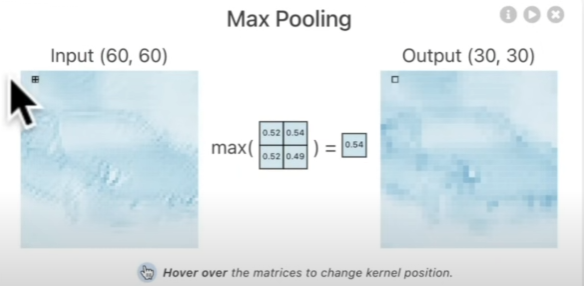

Max pool takes the max value from the kernel_size sliding window and saves it as output.

So because of this the size of the output becomes half of the input size

In [21]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)

test_image_through_conv=conv_layer(test_image)
print(f"Shape after going through conv layer:{test_image_through_conv.shape}")

test_image_through_conv_and_maxpool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through maxpool layer:{test_image_through_conv_and_maxpool.shape}")

Shape after going through conv layer:torch.Size([10, 64, 64])
Shape after going through maxpool layer:torch.Size([10, 32, 32])


In [22]:
x=torch.randn(1,1,2,2)
x


tensor([[[[ 1.2135,  0.7924],
          [-0.4401,  0.4996]]]])

In [23]:
ans_max=max_pool_layer(x) # It return the max value
ans_max

tensor([[[[1.2135]]]])

In [24]:
conv_layer_2=nn.Conv2d(in_channels=10,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
test_image_after2=conv_layer_2(test_image_through_conv_and_maxpool)
test_image_after2.shape

torch.Size([10, 32, 32])

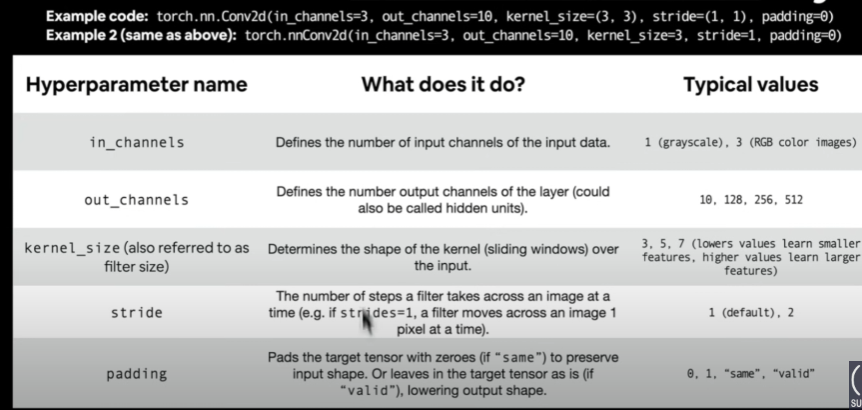

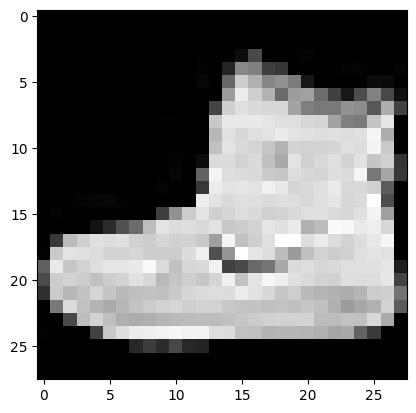

In [25]:
#plt.imshow(image,cmap="grey") This will show error because image shape is not allowed
plt.imshow(image.squeeze(),cmap="grey")

In [26]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor=rand_image_tensor.to(device)
rand_image_tensor.device

device(type='cuda', index=0)

We see that we are getting error in classifier layer

In [27]:
#Pass the image through our model
model_2(rand_image_tensor.unsqueeze(dim=0))

""""
The output of the Conv block 2 layer matrix is 1x490
ie [1,10,7,7] so when u flatten this layer u get 490
as 10*7*7=490

Our hidden_units is 1x10...so thats why its causing errors
so to fix it we will multiply hidden_units*7*7 in our classifier layer
"""


'"\nThe output of the Conv block 2 layer matrix is 1x490\nie [1,10,7,7] so when u flatten this layer u get 490\nas 10*7*7=490\n\nOur hidden_units is 1x10...so thats why its causing errors\nso to fix it we will multiply hidden_units*7*7 in our classifier layer\n'

##Setting up a loss function

In [28]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.1)

In [29]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

##Training and testing loop

In [30]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0

  # Put model in training mode
  model.train()

  #add a lop to loop through the training batches
  for batch,(X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)

    #forward pass
    y_pred=model(X)

    #loss function
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))# #logits->prediction labels we do this so that y and y_pred are of same type

    #optimizer
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #step function
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(data_loader.dataset)} samples")

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss:.5f} | Train acc:{train_acc:.2f}%")



In [31]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):

  test_loss,test_acc=0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      # Send the data to the target device
      X,y=X.to(device),y.to(device)

      # Forward Pass
      test_pred=model(X)

      # Calculate the loss/acc
      loss=loss_fn(test_pred,y)
      test_loss+=loss
      test_acc+=accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1)) #logits->prediction labels

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test Loss:{test_loss:.5f} | Test acc:{test_acc:.5f}\n")

In [32]:
from timeit import default_timer as timer
def print_train_time(start:float, #The start time
                    end:float,    # The end time
                    device:torch.device=None): #This is none for now cuz we want to check speed between cuda and cpu
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [33]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
      for X,y in tqdm(data_loader):
        X=X.to(device)
        y=y.to(device)
        y_pred=model(X)

        loss+=loss_fn(y_pred,y)
        acc+=accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      loss/=len(data_loader)
      acc/=len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in range(epochs):
  print(f"Epoch:{epoch}\n-----")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2=timer()

total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                        end=train_time_end_model_2,
                                        device=None)


Epoch:0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.59631 | Train acc:78.26%
Test Loss:0.39070 | Test acc:86.01238

Epoch:1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.36155 | Train acc:86.83%
Test Loss:0.35623 | Test acc:86.93091

Epoch:2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.32419 | Train acc:88.23%
Test Loss:0.33573 | Test acc:88.11901

Train time on None: 34.426 seconds


In [35]:
from tqdm.auto import tqdm
model_2_results=eval_model(model=model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33573198318481445,
 'model_acc': 88.11900958466454}

##You can see that our model_2 results are better than model_0 and model_1 that we made from torch vision

##Make and evaluate random predictions with FashionMNISTModelV2

In [36]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #add the extra batch dimension
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass
      pred_logit=model(sample)

      #prediction prob
      pred_pred=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_pred.cpu())
  return torch.stack(pred_probs)

In [37]:
import random
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

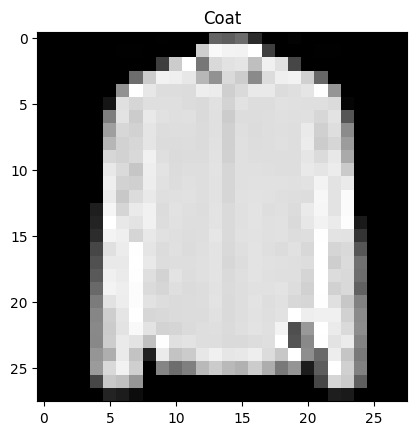

In [38]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [39]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

pred_probs[:2]

tensor([[1.4685e-03, 1.2398e-04, 2.8982e-02, 2.1603e-04, 7.7300e-01, 5.9202e-05,
         1.9347e-01, 1.8987e-05, 2.5926e-03, 7.4162e-05],
        [6.0108e-01, 8.7436e-06, 7.9445e-05, 7.5290e-04, 1.0604e-05, 4.9865e-06,
         3.9798e-01, 4.2538e-08, 8.1454e-05, 1.1407e-07]])

In [40]:
#pred labels
pred_classes=torch.argmax(pred_probs,dim=1)
pred_classes

tensor([4, 0, 8, 5, 5, 9, 7, 1, 4])

In [41]:
test_labels

[4, 6, 8, 5, 5, 9, 7, 1, 2]

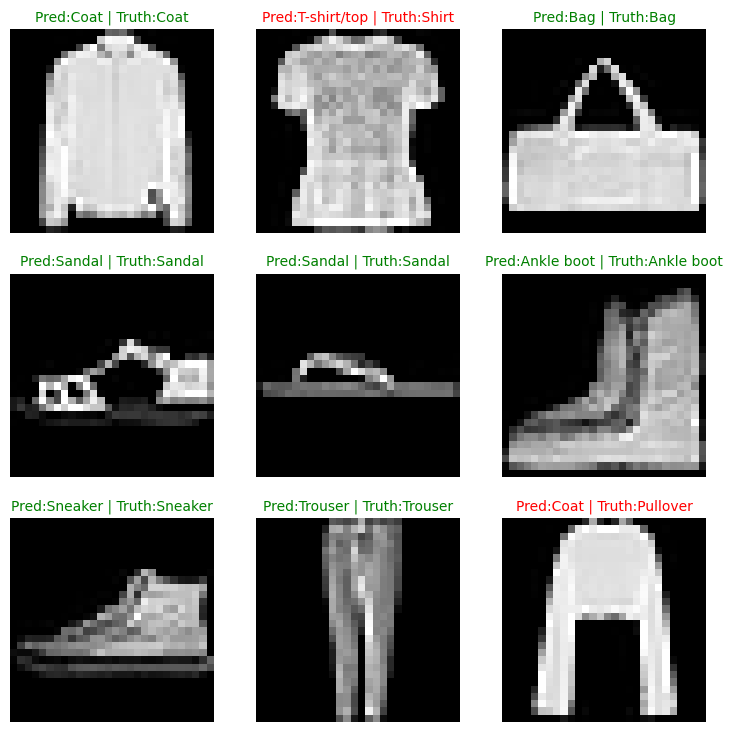

In [42]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1) #because the plot cant start with 0

  plt.imshow(sample.squeeze(),cmap="gray")

  #Find the prediction in text
  pred_label=class_names[pred_classes[i]]

  #Get the truth label
  truth_label=class_names[test_labels[i]]

  title_text=f"Pred:{pred_label} | Truth:{truth_label}"

  plt.axis(False)
  if pred_label == truth_label:
    plt.title(title_text,c="g",fontsize=10)
  else:
    plt.title(title_text,c="r",fontsize=10)

##You can see that the model is accurate for most of the cases but for some cases its not

**We make a confusion matrix to evaluate the model even more**




1.   Make predictions with our trained model on the test dataset
2.   Make a confusion matrix `torchmetrics.ConfusionMatrix`
1.   plot the confusion matrix..do this with the help of **mixtend plot confusion matrix**




In [43]:
import mlxtend

In [44]:
from tqdm.auto import tqdm

# 1.Make predictions with trained model
y_pred=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):
    X,y=X.to(device),y.to(device)

    #Do forward pass

    y_logits=model_2(X)

    y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)

    y_pred.append(y_preds.cpu())

print(y_pred)


  0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 0, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 5, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
        1, 3, 5, 0, 4, 7, 9, 3]), tensor([7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 4, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 4,
        2, 4, 9, 7, 6, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 4, 3, 0, 8, 3, 7, 4,
       

##But these many tensors are not a good approach to evaluate...so we concatenate this tensor into one for evaluation

In [45]:
y_pred_tensor=torch.cat(y_pred)
y_pred_tensor[:10],len(y_pred_tensor) #lenght will be 10000 as 1 prediction per test sample,there r 10000 samples in test


(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [46]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19,"mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.8 MB/s eta 0:00:00
mlxtend version:0.23.4


In Confusion Matrix we pass the num classes or the length of the class_names

In [47]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#Set up confusion instance and compare predictions to targets
confmat=ConfusionMatrix(task="multiclass",num_classes=len(class_names))

confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)
confmat_tensor

tensor([[850,   2,   9,  38,   6,   1,  86,   0,   8,   0],
        [  2, 968,   1,  20,   4,   0,   3,   0,   2,   0],
        [ 14,   0, 729,  15, 137,   0, 102,   0,   3,   0],
        [ 14,   5,   7, 920,  26,   0,  27,   0,   1,   0],
        [  0,   2,  31,  42, 848,   0,  76,   0,   1,   0],
        [  0,   0,   0,   0,   0, 988,   0,   8,   2,   2],
        [147,   0,  50,  37,  80,   0, 672,   0,  14,   0],
        [  0,   0,   0,   0,   0,  42,   0, 924,   1,  33],
        [  4,   1,   2,  10,   4,   5,   8,   2, 964,   0],
        [  0,   0,   0,   0,   0,  17,   0,  35,   1, 947]])

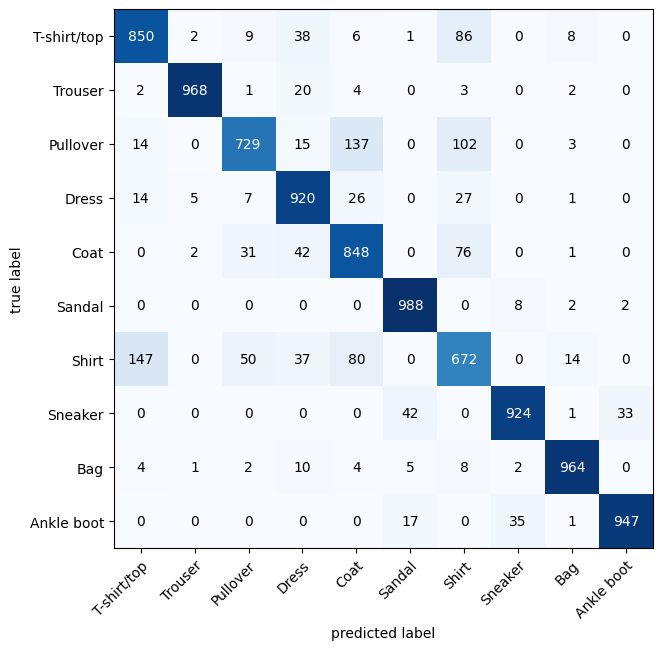

In [48]:
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

##Save and load the best performing model

In [49]:
from pathlib import Path
MODEL_PATH=Path("models")

MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME="CNN_pytorch_computer_vision_model.pth"

MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/CNN_pytorch_computer_vision_model.pth


#Creating a new instance of the model usin the loaded model

In [51]:
torch.manual_seed(42)

loaded_model=FashionMNISTModelV2(input_features=1,
                                 hidden_units=10,
                                 output_shape=len(class_names))
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.to(device)

<ipython-input-51-fe548072a1f3>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [52]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33573198318481445,
 'model_acc': 88.11900958466454}

In [53]:
torch.manual_seed(42)
loaded_model_results=eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33573198318481445,
 'model_acc': 88.11900958466454}

# We can see that our saved model gives the same results as the Original model